In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

### Gather

In [41]:
data = pd.read_csv('survey_results_public.csv', index_col="Respondent")
#schema = pd.read_csv('survey_results_schema.csv', error_bad_lines=False)

### Preliminary Wrangling

O grupo de interesse são os profissionais desenvolvedores empregados full-time.

In [42]:
# Selecting group of interest
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" ')
df.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
Respondent,,,,,,,,,,,,,,,,,,,,,
3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,Pre-series A startup,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees","Privately-held limited company, not in startup...",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,"Privately-held limited company, not in startup...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Assess

Avaliando as colunas que serão utilizadas na Parte 1.

In [43]:
# colunas de interesse
cols_int = ['Professional','EmploymentStatus', 'FormalEducation','Salary','CareerSatisfaction', 
            'EducationImportant', 'ImportantHiringEducation']

df = df[cols_int]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 3 to 51391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Professional              30211 non-null  object 
 1   EmploymentStatus          30211 non-null  object 
 2   FormalEducation           30211 non-null  object 
 3   Salary                    12444 non-null  float64
 4   CareerSatisfaction        29935 non-null  float64
 5   EducationImportant        19476 non-null  object 
 6   ImportantHiringEducation  17627 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [44]:
df['ImportantHiringEducation'].value_counts()

Somewhat important      6873
Not very important      5282
Important               3160
Not at all important    1823
Very important           489
Name: ImportantHiringEducation, dtype: int64

In [45]:
df['EducationImportant'].value_counts()

Somewhat important      5281
Important               5043
Not very important      3945
Very important          3147
Not at all important    2060
Name: EducationImportant, dtype: int64

In [46]:
## Create a ordinal categorical type cat1

cat1 = CategoricalDtype(categories=['Not at all important', 'Not very important', 'Somewhat important','Important', 'Very important'],
                      ordered = True)

df.loc[:,['ImportantHiringEducation', 'EducationImportant']] = df.loc[:,['ImportantHiringEducation', 'EducationImportant']].astype(cat1, copy=True)


In [47]:
df['CareerSatisfaction'].value_counts()        

8.0     8113
7.0     6836
9.0     4139
10.0    3766
6.0     3232
5.0     1939
4.0      827
3.0      586
2.0      240
0.0      163
1.0       94
Name: CareerSatisfaction, dtype: int64

In [48]:
#df['NA_CareerSatisfaction']
df = df.assign(NA_CareerSatisfaction = df['CareerSatisfaction'].notnull().values)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 3 to 51391
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Professional              30211 non-null  object  
 1   EmploymentStatus          30211 non-null  object  
 2   FormalEducation           30211 non-null  object  
 3   Salary                    12444 non-null  float64 
 4   CareerSatisfaction        29935 non-null  float64 
 5   EducationImportant        19476 non-null  category
 6   ImportantHiringEducation  17627 non-null  category
 7   NA_CareerSatisfaction     30211 non-null  bool    
dtypes: bool(1), category(2), float64(2), object(3)
memory usage: 1.5+ MB


In [50]:
df['Salary'].describe()

count     12444.000000
mean      57353.913736
std       39882.230088
min           0.000000
25%       27956.989247
50%       51254.032258
75%       80500.000000
max      197000.000000
Name: Salary, dtype: float64

#### Univariate Exploration

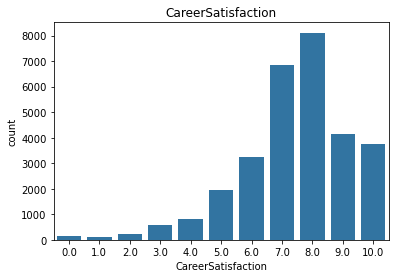

In [51]:
# CareerSatisfaction
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='CareerSatisfaction', color=base_color);
plt.title('CareerSatisfaction');


>* Dos que responderam, a maioria das classificações está em 7 ou 8, seguido dos que classificaram 9 ou 10.
>* Um número muito pequeno de pessoas classificou em 0/1/2/3/4.
>* Portanto, a maior parte dos indivíduos está satisfeito com a carreira.

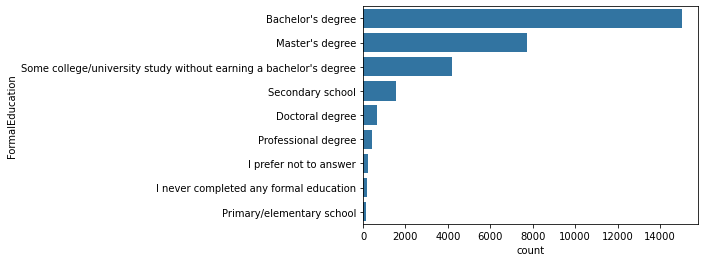

In [52]:
# FormalEducation
sorted_counts = df['FormalEducation'].value_counts() 
sns.countplot(y=df['FormalEducation'] , order = sorted_counts.index, color=base_color);


>* A maior parte dos indivíduos possuem Bachelor's degree/ Master's degree / Some college/university without earning a bachelor's degree.
>* Para facilitar a análise, colocarei todos os indivídos que não têm bacharelado/mestrado/doutorado em um mesmo grupo: "sem diploma acadêmico".


In [53]:
# Renaming individuals without university degree 

def change_string(x):
    """ depois eu escrevo """
    if(x != "Bachelor's degree") and (x != "Master's degree") and (x != "Doctoral degree"):
        x = "No college/university degree"
    return x

df['FormalEducation'] = df['FormalEducation'].map(change_string)


In [54]:
df['FormalEducation'].value_counts()

Bachelor's degree               15033
Master's degree                  7751
No college/university degree     6750
Doctoral degree                   677
Name: FormalEducation, dtype: int64

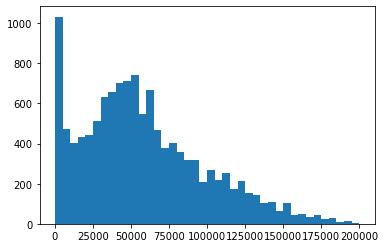

In [55]:
# Salary
bin_edges = np.arange(0, df['Salary'].max()+5000, 5000)
plt.hist(data=df, x='Salary', bins=bin_edges);

>* Nota-se que a distribuição se assemelha a uma distribuição right-skewed. 
>* No entanto, a maioria dos indivíduos recebe até 5000, o que não faz muito sentido, visto que esse valor seria muito baixo para um salário anual.
>* Talvez esses indivíduos tenham colocado seu salário mensal ou por horas trabalhadas. Assim, nas análises futuras, consideraremos indivíduos com salários acima de $25000, que um valor razoável para um salário mínimo anual.

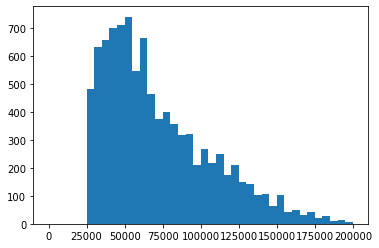

In [56]:
# Choose individuals with salary greater than 25000
df = df.query('Salary > 25000')
bin_edges = np.arange(0, df['Salary'].max()+5000, 5000)
plt.hist(data=df, x='Salary', bins=bin_edges);

### Bivariate Exploration

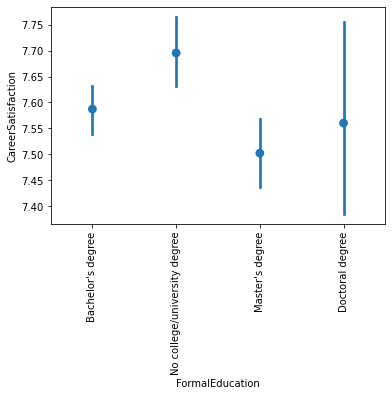

In [57]:
# CareerSatisfaction vs FormalEducation
sns.pointplot(data=df, x='FormalEducation', y='CareerSatisfaction', color=base_color, linestyles="");
plt.xticks(rotation=90);

In [58]:
df_2 = df[['FormalEducation', 'Salary', 'CareerSatisfaction']]
#df_2 = df_2.dropna()
df_2.groupby('FormalEducation').mean()['CareerSatisfaction'].sort_values(ascending=False)

FormalEducation
No college/university degree    7.695511
Bachelor's degree               7.587315
Doctoral degree                 7.560440
Master's degree                 7.502459
Name: CareerSatisfaction, dtype: float64

> Na média, a satisfação com a carreira tem valores próximos, sendo ela maior para os indivíduos sem diploma acadêmico (7.70), seguida pela daqueles com bacharelado (7.59), doutorado (7.56) e mestrado (7.50).

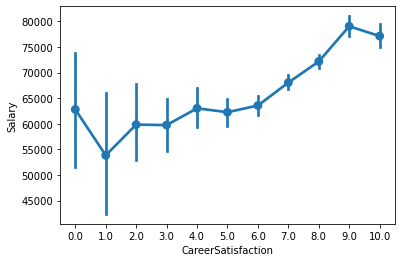

In [59]:
# CareerSatisfaction vs Salary
df.groupby('CareerSatisfaction').mean()['Salary']
sns.pointplot(data=df, x='CareerSatisfaction', y='Salary');

> Na média, os salários são maiores para indivíduos com maior satisfação com a carreira, isso indica uma correlação positiva entre as duas variáveis.

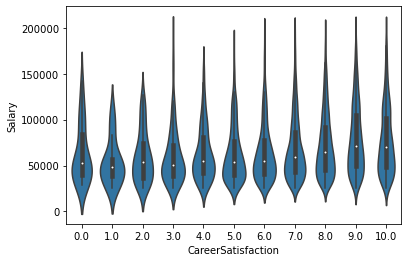

In [60]:
# CareerSatisfaction vs Salary
sns.violinplot(data=df, y='Salary', x='CareerSatisfaction', color=base_color);
#sns.boxplot(data=df, y='Salary', x='CareerSatisfaction', color=base_color);

>* Os boxplots dos salários dos indivídios em que CareerSatisfaction está entre 7 e 10 possuem medianas maiores que as dos demais.
>* Ao mesmo tempo, o violinplot mostra que a distribuição desses salários é mais "espalhada" para níveis de satisfação mais altos.

## Parte 1

#### Question: Qual a importância do nível de educação na contratação de um novo funcionário?

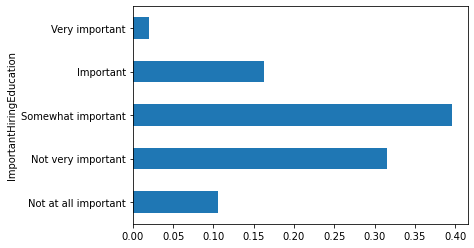

In [61]:
# ImportantHiringEducation
HiringEducation = df.groupby('ImportantHiringEducation').count().iloc[:,0]
HiringEducation = HiringEducation / HiringEducation.sum()
HiringEducation.plot.barh();

> A maior parte dos indivíduos considera o nível educacional de um funcionário entre "Somewhat important" e "Not very important".
> No entanto, para verificar se há algum viés dependente da formação educacional de cada indivíduo, vamos gerar um só gráfico de barras com os dados divididos entre cada grupo da variável "FormalEducation".

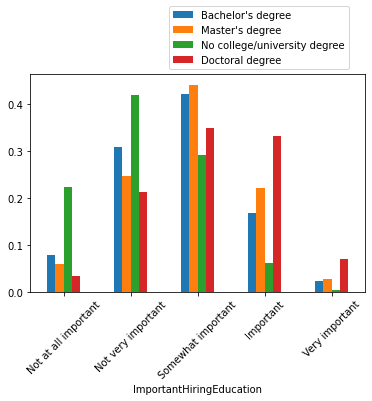

In [62]:
# ImportantHiringEducation por FormalEducation 

aux=df.groupby(['FormalEducation','ImportantHiringEducation']).count()['Professional'].rename('count') 
new_df = pd.DataFrame()

degrees = df['FormalEducation'].value_counts().index
for degree in degrees:
    x = aux.loc[degree].rename(degree)
    new_df = pd.concat([new_df, pd.DataFrame(x)], axis=1)

    # colocar no mesmo for de cima
for degree in degrees:
    new_df[degree] = new_df[degree] / new_df[degree].sum()


new_df.plot.bar();
plt.xticks(rotation=45);
#plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.5));
plt.legend(bbox_to_anchor=(0.4, 1));

> Agora, vemos que os indíviduos com doutorado, são os que mais consideram a educação importante na hora de contratar um funcionário, enquanto aqueles sem diploma acadêmico consideram que a Educação é menos importante.  Os demais grupos possuem distribuições parecidas, porém os que têm bacharelado consideram educação um pouco menos importante que os que têm mestrado.

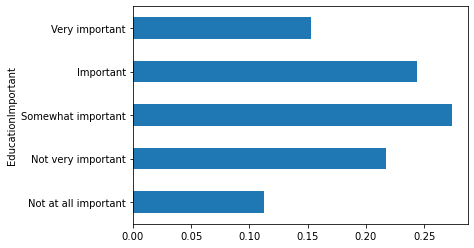

In [63]:
# EducationImportant
EducationImportant = df.groupby('EducationImportant').count().iloc[:,0]
EducationImportant = EducationImportant/ EducationImportant.sum()
EducationImportant.plot.barh();

> Na média, esse gráfico mostra que a maior parte dos indivíduos considera Educação de "somewhat important" a "important" na carreira de um trabalhador.

> No entanto, vamos partir para a mesma análise feita para cada grupo de "FormalEducation".

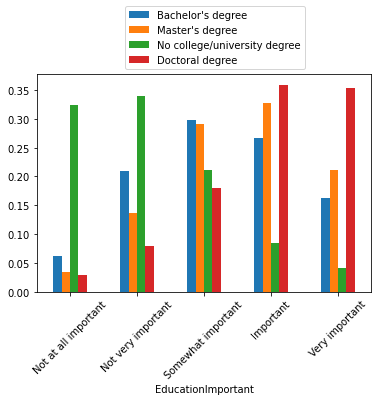

In [64]:
# EducationImportant

aux=df.groupby(['FormalEducation','EducationImportant']).count()['Professional'].rename('count') 
new_df = pd.DataFrame()

degrees = df['FormalEducation'].value_counts().index
for degree in degrees:
    x = aux.loc[degree].rename(degree)
    new_df = pd.concat([new_df, pd.DataFrame(x)], axis=1)

    # colocar no mesmo for de cima
for degree in degrees:
    new_df[degree] = new_df[degree] / new_df[degree].sum()

new_df.plot.bar();
plt.xticks(rotation=45);
plt.legend(bbox_to_anchor=(0.25, 1));

> Nesse caso, temos que a maior parte dos indivíduos com doutorado consideram educação de "important" para "very important". Enquanto a maior parte daqueles com mestrado consideram educação de "Somewhat important" para "very important".Aqueles com bacharelado, estão mais bem distribuídos em cada categoria, sendo a maior parte entre "not very important" e "important". Por fim, a maior parte dos indivíduos sem diploma acadêmico consideram educação entre "Not at all important" e "Not very important". 

> Portanto, quanto maior o nível acadêmico do desenvolvedor, maior será o nível de importância atribuído à Educação.

## Parte 2

### Quais hábitos estão relacionados com o a satisfação com a carreira?


* OtherPeoplesCode: Maintaining other people's code is a form of torture
* EnjoyDebugging: I enjoy debugging code
* DifficultCommunication: I have difficulty communicating my ideas to my peers
* UnderstandComputers: "Honestly, there's a lot about computers that I just don't understand"
* ShipIt: It's better to ship now and optimize later
* CompetePeers: I think of myself as competing with my peers
* ChallengeMyself: I like to challenge myself
* WorkPayCare: "I don't really care what I work on, so long as I'm paid well"
* SeriousWork: I take my work very seriously
* ProgramHobby: ,Do you program as a hobby or contribute to open source projects?
* CareerSatisfaction: Career satisfaction rating
* Salary: "What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?"

In [82]:
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" and Salary >25000')

cols2 = ['OtherPeoplesCode', 'EnjoyDebugging', 'ShipIt', 'DifficultCommunication', 'CompetePeers',
         'ChallengeMyself', 'WorkPayCare', 'SeriousWork', 'UnderstandComputers', 'ProgramHobby', 
         'CareerSatisfaction', 'Salary']

df = df[cols2]


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OtherPeoplesCode        6685 non-null   object 
 1   EnjoyDebugging          6682 non-null   object 
 2   ShipIt                  6688 non-null   object 
 3   DifficultCommunication  6683 non-null   object 
 4   CompetePeers            6668 non-null   object 
 5   ChallengeMyself         6669 non-null   object 
 6   WorkPayCare             6682 non-null   object 
 7   SeriousWork             6670 non-null   object 
 8   UnderstandComputers     6676 non-null   object 
 9   ProgramHobby            9631 non-null   object 
 10  CareerSatisfaction      9604 non-null   float64
 11  Salary                  9631 non-null   float64
dtypes: float64(2), object(10)
memory usage: 978.1+ KB


In [84]:
df=df.dropna(axis=0, subset= ['CareerSatisfaction'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OtherPeoplesCode        6665 non-null   object 
 1   EnjoyDebugging          6662 non-null   object 
 2   ShipIt                  6668 non-null   object 
 3   DifficultCommunication  6664 non-null   object 
 4   CompetePeers            6650 non-null   object 
 5   ChallengeMyself         6651 non-null   object 
 6   WorkPayCare             6664 non-null   object 
 7   SeriousWork             6652 non-null   object 
 8   UnderstandComputers     6658 non-null   object 
 9   ProgramHobby            9604 non-null   object 
 10  CareerSatisfaction      9604 non-null   float64
 11  Salary                  9604 non-null   float64
dtypes: float64(2), object(10)
memory usage: 975.4+ KB


In [85]:
df['UnderstandComputers'].value_counts()

Disagree             1912
Somewhat agree       1645
Agree                1410
Strongly disagree     905
Strongly agree        786
Name: UnderstandComputers, dtype: int64

In [86]:
cat2 = CategoricalDtype(categories=['Strongly disagree', 'Disagree', 'Somewhat agree','Agree', 'Strongly agree'],
                      ordered = True)

df[cols2[:-3]]= df[cols2[:-3]].astype(cat2)
df.info()
     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OtherPeoplesCode        6665 non-null   category
 1   EnjoyDebugging          6662 non-null   category
 2   ShipIt                  6668 non-null   category
 3   DifficultCommunication  6664 non-null   category
 4   CompetePeers            6650 non-null   category
 5   ChallengeMyself         6651 non-null   category
 6   WorkPayCare             6664 non-null   category
 7   SeriousWork             6652 non-null   category
 8   UnderstandComputers     6658 non-null   category
 9   ProgramHobby            9604 non-null   object  
 10  CareerSatisfaction      9604 non-null   float64 
 11  Salary                  9604 non-null   float64 
dtypes: category(9), float64(2), object(1)
memory usage: 386.3+ KB


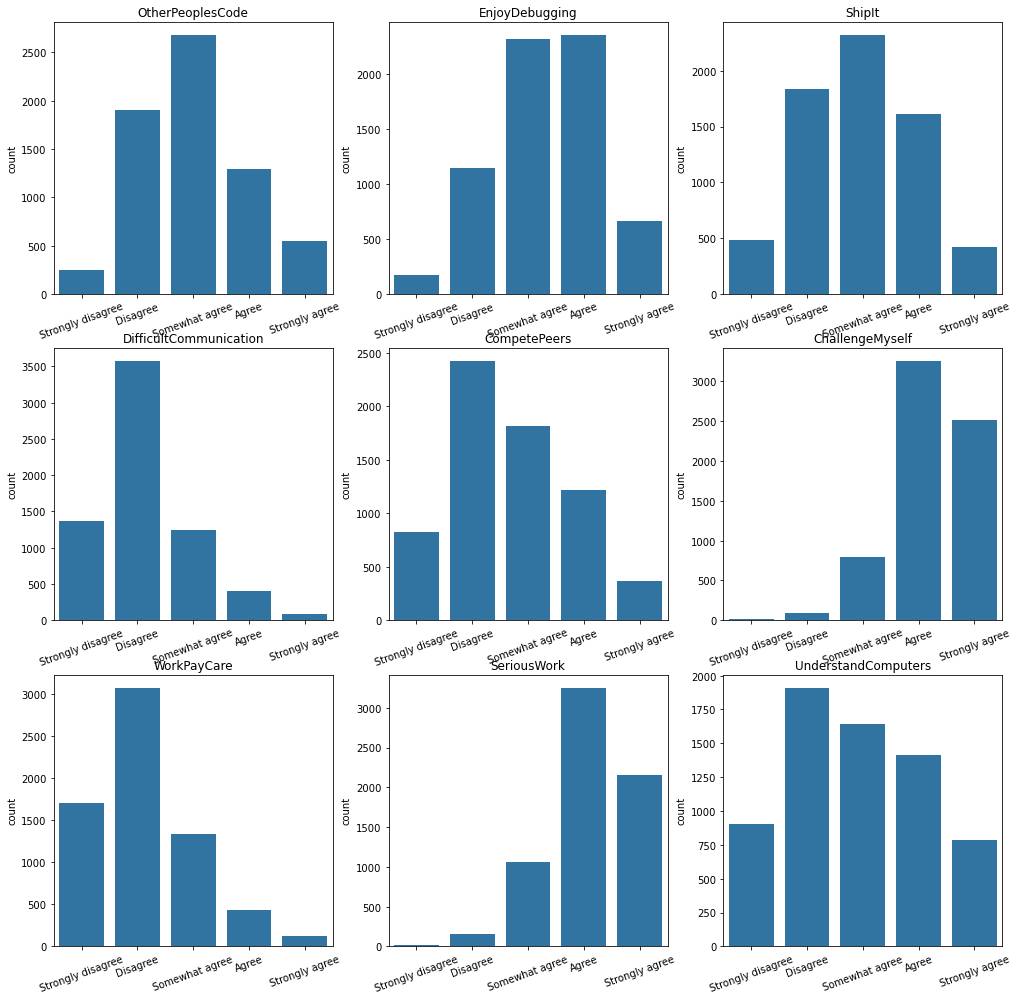

In [87]:
# Univariate Exploration

# Count plot of features
base_color=sns.color_palette()[0]

i=1
plt.figure(figsize=(17,17))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.countplot(data=df, x=col, color=base_color)
    plt.xticks(rotation=20);
    plt.xlabel("")
    plt.title(col)
    i = i+1

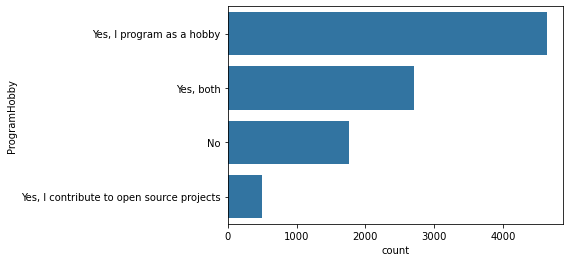

In [88]:
# ProgramHobby
sorted_values = df['ProgramHobby'].value_counts().index
sns.countplot(data=df, y='ProgramHobby', order=sorted_values, color=base_color);


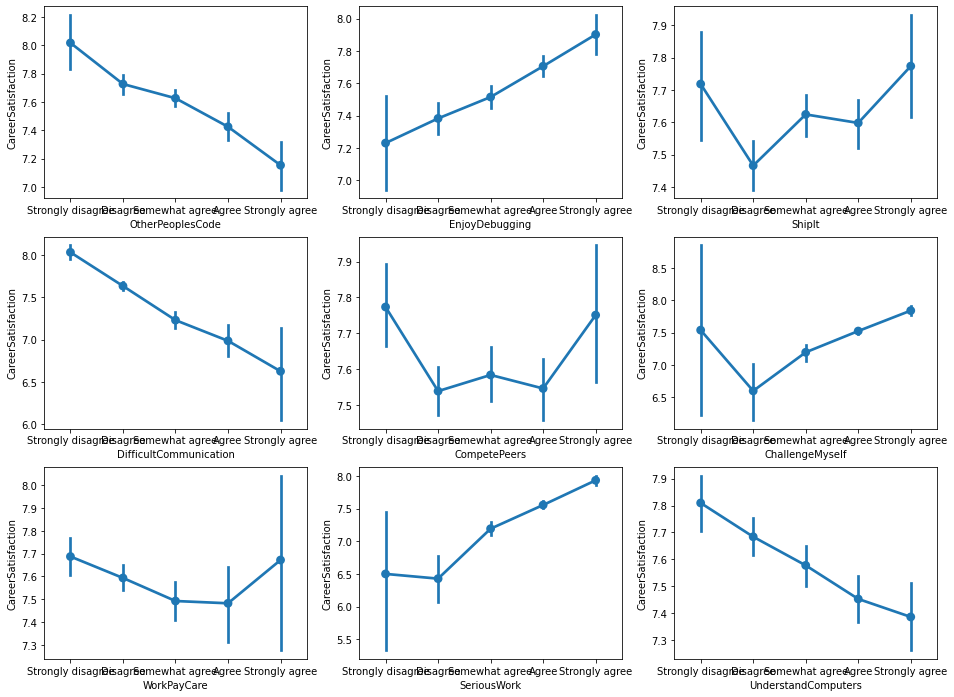

In [89]:
# Bivariate Exploration

# cols3 vs CareerSatis
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.pointplot(data=df, x= col, y='CareerSatisfaction')
    i=i+1

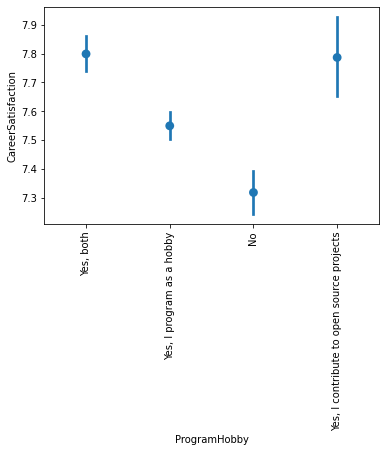

In [90]:
# CareerSatisfaction vs ProgramHobby
ax = sns.pointplot(data=df, x='ProgramHobby', y='CareerSatisfaction', linestyles='')
plt.xticks(rotation=90);

In [74]:
df.groupby('ProgramHobby').mean()['CareerSatisfaction'].sort_values(ascending=False)


ProgramHobby
Yes, both                                    7.799409
Yes, I contribute to open source projects    7.787018
Yes, I program as a hobby                    7.549278
No                                           7.317487
Name: CareerSatisfaction, dtype: float64

## Parte 3

> Hábitos relacionados com os melhores salários



In [91]:
df = data.query('Professional == "Professional developer" and EmploymentStatus == "Employed full-time" and Salary >25000')
df = df[cols2]

In [92]:
df = df.dropna(axis=0, subset= ['Salary'])
cat2 = CategoricalDtype(categories=['Strongly disagree', 'Disagree', 'Somewhat agree','Agree', 'Strongly agree'],
                      ordered = True)

df[cols2[:-3]]= df[cols2[:-3]].astype(cat2)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 3 to 51391
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OtherPeoplesCode        6685 non-null   category
 1   EnjoyDebugging          6682 non-null   category
 2   ShipIt                  6688 non-null   category
 3   DifficultCommunication  6683 non-null   category
 4   CompetePeers            6668 non-null   category
 5   ChallengeMyself         6669 non-null   category
 6   WorkPayCare             6682 non-null   category
 7   SeriousWork             6670 non-null   category
 8   UnderstandComputers     6676 non-null   category
 9   ProgramHobby            9631 non-null   object  
 10  CareerSatisfaction      9604 non-null   float64 
 11  Salary                  9631 non-null   float64 
dtypes: category(9), float64(2), object(1)
memory usage: 387.4+ KB


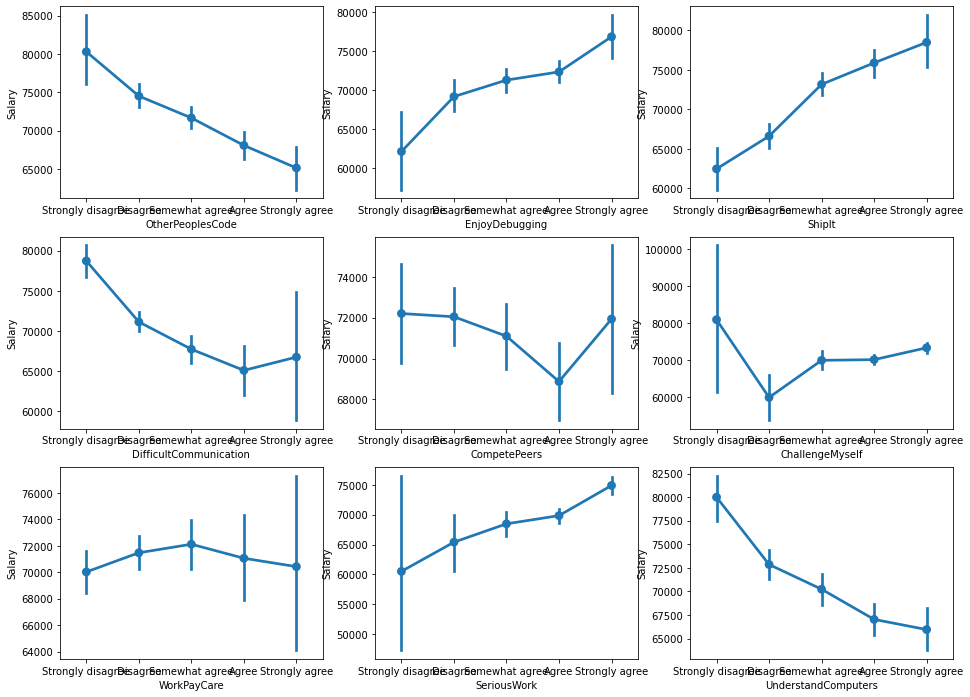

In [93]:
# cols2 vs Salary
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    plt.subplot(3,3,i)
    sns.pointplot(data=df, x= col, y='Salary')
    i=i+1

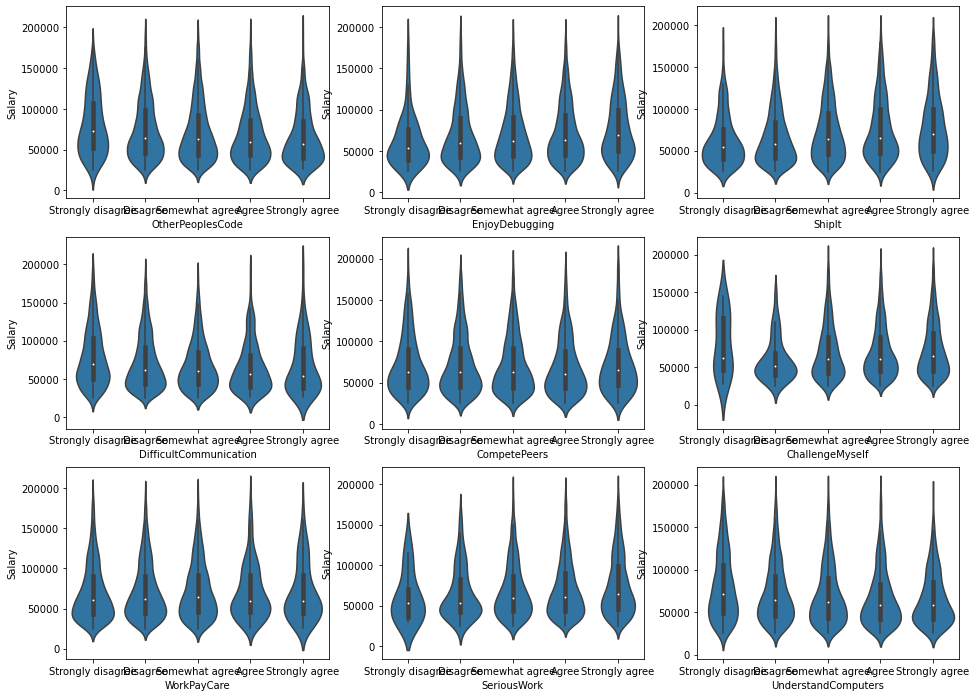

In [78]:
# cols2 vs Salary
i=1
plt.figure(figsize=(16,12))
for col in cols2[:-3]:
    
    plt.subplot(3,3,i)
    sns.violinplot(data=df, x=col, y="Salary", color=base_color)
    i=i+1

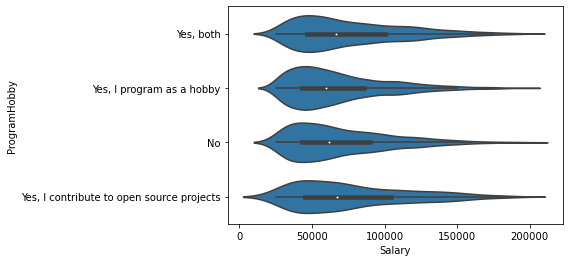

In [79]:
# ProgramHobby
sns.violinplot(data=df, y='ProgramHobby', x='Salary', color=base_color);

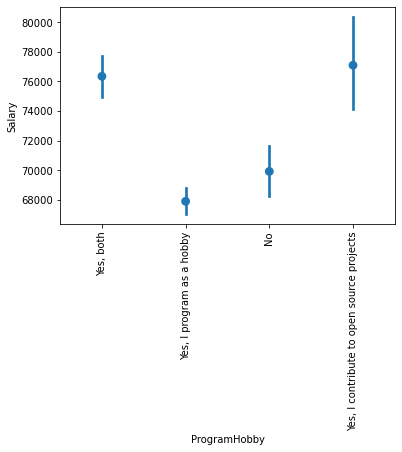

In [80]:
# Salary vs ProgramHobby
ax = sns.pointplot(data=df, x='ProgramHobby', y='Salary', linestyles='')
plt.xticks(rotation=90);

In [81]:
salary_prg_hobby = df.groupby('ProgramHobby').mean()['Salary'].sort_values(ascending=False)
salary_prg_hobby

ProgramHobby
Yes, I contribute to open source projects    77087.380575
Yes, both                                    76338.493668
No                                           69912.791026
Yes, I program as a hobby                    67890.740061
Name: Salary, dtype: float64